In [20]:
#pip install opencv-python numpy matplotlib


In [21]:
#pip install mahotas

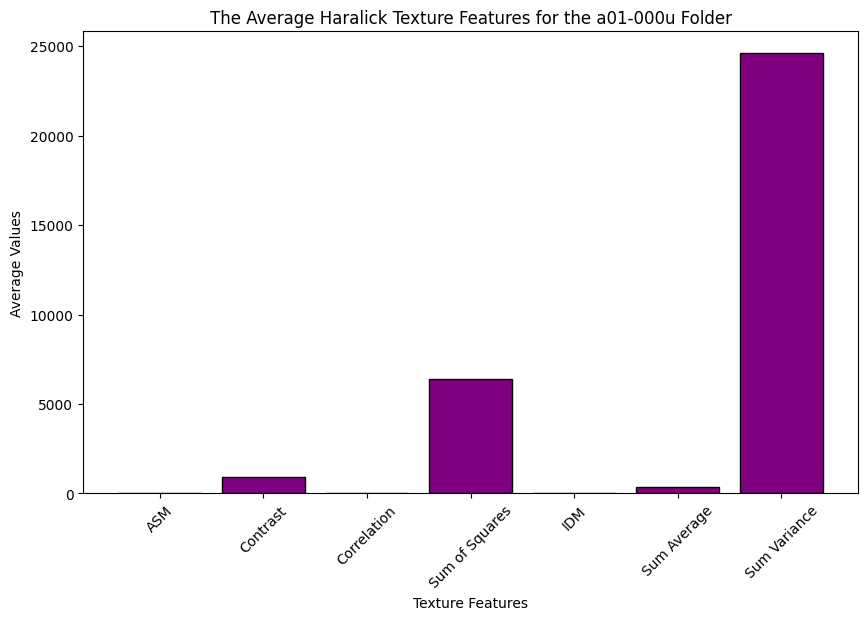

In [22]:
import os
import mahotas as mh
import numpy as np
import matplotlib.pyplot as plt

# path to the a01-000u folder
folder_path = r'C:Desktop\DS4002\DS4002Project2\dataset\IAM Dataset\iam_words\words\a01\a01-000u'  

# array for features
array_features = np.zeros(7)

# this function calculates the features
def compute_haralick_features(image_path):
    image = mh.imread(image_path)
    textures = mh.features.haralick(image)
    return textures.mean(axis=0)

# this iterates through all of the images in the specified folder
num = 0
for file in os.listdir(folder_path):
    if file.endswith(".png"):
        image_path = os.path.join(folder_path, file)
        features = compute_haralick_features(image_path)
        array_features += features[:7]  # We only need first 7 features
        num += 1

# finding the average of the features
average = array_features / num

# bar plot
features_list = ['ASM', 'Contrast', 'Correlation', 'Sum of Squares', 'IDM', 'Sum Average', 'Sum Variance']
plt.figure(figsize=(10, 6))
plt.bar(features_list, average, color='purple', edgecolor='black')
plt.title('The Average Haralick Texture Features for the a01-000u Folder')
plt.xlabel('Texture Features')
plt.ylabel('Average Values')
plt.xticks(rotation=45)
plt.show()





In [23]:
#pip install opencv-python


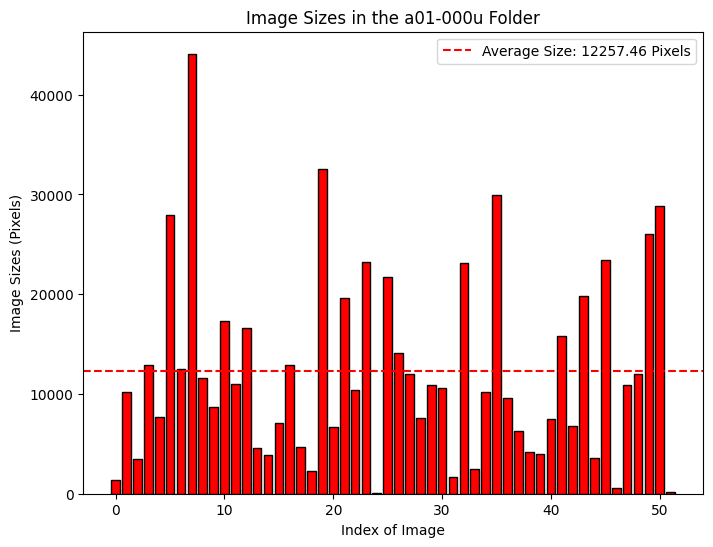

In [24]:
import os
import cv2
import matplotlib.pyplot as plt
import numpy as np
# list for the sizes of different images
sizes = []

# this iterates through all of the images in the specified folder
for file in os.listdir(folder_path):
    if file.endswith(".png"):
        image_path = os.path.join(folder_path, file)
        image = cv2.imread(image_path, cv2.IMREAD_UNCHANGED)
        height, width = image.shape[:2]  # Get the height and the width
        sizes.append(height * width) # add it to the list

# finding the average of the images
average = np.mean(sizes)

# bar plot
plt.figure(figsize=(8, 6))
plt.bar(range(len(sizes)), sizes, color='red', edgecolor='black')
plt.title('Image Sizes in the a01-000u Folder')
plt.xlabel('Index of Image')
plt.ylabel('Image Sizes (Pixels)')
plt.axhline(y=average, color='r', linestyle='--', label=f'Average Size: {average:.2f} Pixels')
plt.legend()
plt.show()
